# Matplotlib 시각화 - 데이터프레임 적용
- 데이터 시각화를 위한 파이썬 라이브러리
- https://matplotlib.org/

In [2]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm

#  한글글꼴로 변경
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

['batang']
20.0


In [67]:
# PassengerId를 index명으로 지정
df = pd.read_csv('../data/train.csv', index_col = 'PassengerId')
df.shape

(891, 11)

In [68]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Embarked 컬럼으로 그래프 그리기

In [71]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [76]:
df_em = df['Embarked']

# 결측값 알아보기
# np.count_nonzero(df_em.insull())
df_em.isnull().sum()

2

In [81]:
# 결측값을 가진 데이터 추출하기
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [83]:
df['Embarked'][df['Fare']==80]

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [92]:
df['Embarked'][(df['Fare']>=79) & (df['Fare']<=81)].value_counts()

C    4
S    3
Name: Embarked, dtype: int64

In [101]:
# 결측 값을 C로 변경하기
df[df['Fare']==80]

df.loc[62, 'Embarked'] = 'C'
df.loc[830, 'Embarked'] = 'C'

In [103]:
df['Embarked'][df['Fare']==80]

PassengerId
62     C
830    C
Name: Embarked, dtype: object

In [106]:
df_em = df['Embarked']
df_em.value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [110]:
# 가로 막대 그래프 그리기
x = df_em.value_counts().index
y = df_em.value_counts().values

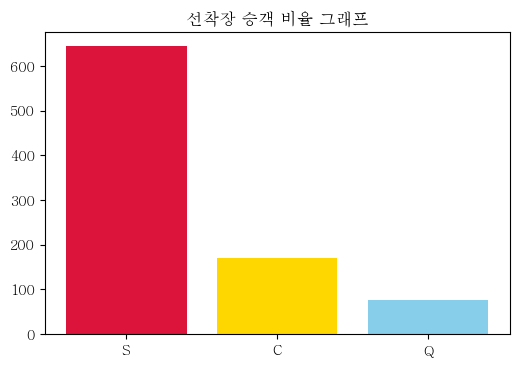

In [115]:
fig = plt.figure(dpi=100)
plt.bar(x,y, color=['crimson', 'gold', 'skyblue'])
plt.title('선착장 승객 비율 그래프')
plt.show()

## 퀴즈 :

```
1) 남녀의 비율을 파이 그래프로 출력하여라
2) pclass 컬럼을 기록 막대 그래프로 출력하여라
```

In [125]:
male = df['Sex'].value_counts()[0]
female = df['Sex'].value_counts()[1]

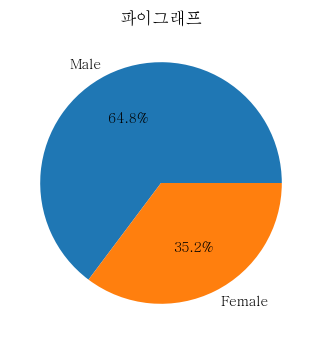

In [127]:
# 1
labels='Male', 'Female'
values = [male, female]

fig = plt.figure(dpi=100)
fig4, plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('파이그래프')
plt.show()

[3, 1, 2] [491, 216, 184]


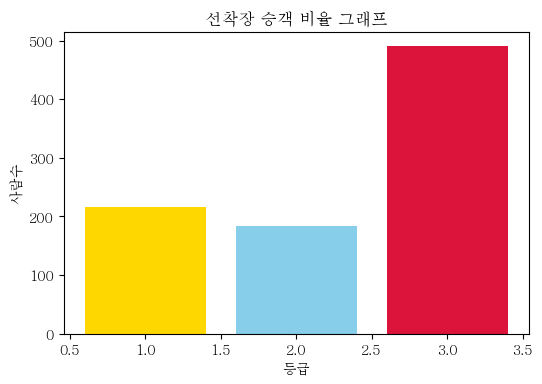

[3, 491]

In [161]:
grade = []
people = []
for cnt,i in enumerate(df['Pclass'].value_counts()):
    grade.append(df['Pclass'].value_counts().index[cnt])
    people.append(df['Pclass'].value_counts().values[cnt])

print(grade, people)
fig = plt.figure(dpi=100)
plt.bar(grade,people, color=['crimson', 'gold', 'skyblue'])
plt.title('선착장 승객 비율 그래프')
plt.xlabel('등급')
plt.ylabel('사람수')
plt.show()
temp[0]